In [2]:
!pip install yfinance scikit-learn --quiet

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
# Download stock data for Apple (change 'AAPL' to 'TSLA' or other symbols if you want)
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, period='6mo', interval='1d')

# Display first few rows
print(data.head())

/tmp/ipython-input-8-3643700597.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-22  223.291367  223.580662  219.261080  219.261080  64126500
2025-01-23  223.121780  226.483666  221.765053  224.199183  60234800
2025-01-24  222.243881  225.087029  220.877183  224.239068  54697900
2025-01-27  229.306854  231.591337  223.440999  223.480912  94863400
2025-01-28  237.686630  239.611994  230.254561  230.294474  75707600


In [13]:
# Drop rows with any missing values
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

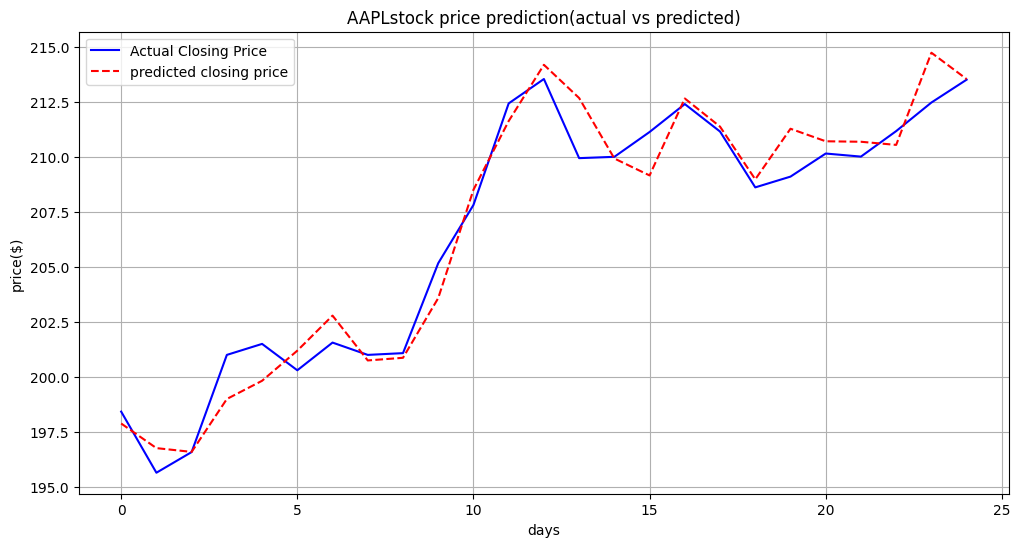

In [15]:
y_test=y_test.reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.plot(y_test,label='Actual Closing Price',color='blue')
plt.plot(y_pred,label='predicted closing price',color='red',linestyle='--')
plt.title(f'{stock_symbol}stock price prediction(actual vs predicted)')
plt.xlabel('days')
plt.ylabel('price($)')
plt.legend()
plt.grid(True)
plt.show()